## This notebook shows all the means to create a Diagram and set the spots
* To instanciate a `Diagram` allows you to apply efficiently filters based on image processing.
* They are several means to instanciate a `diagram` some of them are betters than overs.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import torch

from laueimproc.io.download import get_samples  # gives access to the dataset
from laueimproc import Diagram  # you don't need to import more to access all the filters

# you can juste import the main module
# import laueimproc  # then acces to `Diagram` with laueimproc.Diagram

### Firstly, we have to create an "empty" diagram from an image
* A diagram is an abstraction of a Laue diffraction image, containing some spots.
* Before having spots, it is firstaval an image!

In [2]:
print("*** How to init an empty diagram? ***")
print(Diagram.__init__.__doc__)
print("***   What are the attributes ?   ***")
for cls in Diagram.mro()[1::-1]:
    print(cls.__doc__)

*** How to init an empty diagram? ***
Create a new diagram with appropriated metadata.

        Parameters
        ----------
        data : path or arraylike
            The filename or the array/tensor use as a diagram.
            For memory management, it is better to provide a pathlike rather than an array.
        
***   What are the attributes ?   ***
A Basic diagram with the fondamental structure.

    Attributes
    ----------
    file : pathlib.Path or None
        The absolute file path to the image if provided, None otherwise (readonly).
    bboxes : np.ndarray
        The tensor of the bounding boxes (anchor_i, anchor_j, height, width)
        for each spots of shape (n, 4) (readonly).
    image : laueimproc.classes.image.Image
        The complete brut image of the diagram (readonly).
    rois : laueimproc.classes.image.Image
        The tensor of the regions of interest for each spots (readonly).
        For writing, use `self.spots = ...`.
    spots : list[laueimproc.cl

In [3]:
print(file := next(get_samples().iterdir()))  # we get the path of a Laue diffraction image on the disk
diag = Diagram(file)  # it is the cannonical way to instanciate a Diagram

# try not to do that because it is very dangerous!
arr_numpy = np.array(diag.image)  # let consider it comes from somewhere else
arr_torch = torch.from_numpy(arr_numpy)
diag_from_numpy = Diagram(arr_numpy)
diag_from_torch = Diagram(arr_torch)

/home/rrichard/.cache/laueimproc/samples/NMC_mapHR_0721.tif


## Secondly, the spots must be initialized
The idea is to init the diagram with a lot of spots, then to throw the spots you don't want by filtering.

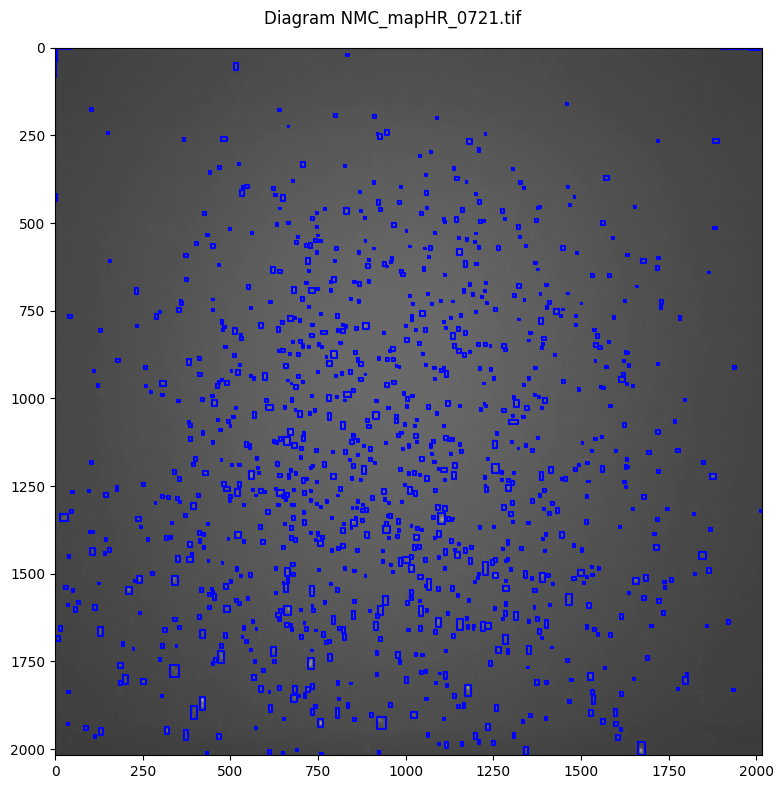

In [4]:
# 1: use the internal peaks_search, it removes the background in the rois
diag_tmp = diag.clone()  # real copy
diag_tmp.searched_spots(threshold=4.0)  # parameters are optional, there are other, see the doc
diag_tmp.plot(plt.figure(layout="tight", figsize=(8, 8))); plt.show()